In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

# Importing Libraries:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.model_selection import GroupShuffleSplit
from sklearn.impute import SimpleImputer
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import tensorflow as tf

2022-12-06 23:00:34.429574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 23:00:35.023313: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64
2022-12-06 23:00:35.023380: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64
2022-12-06 23:00:35.023386: W te

In [2]:
data= pd.read_csv('train.csv',keep_default_na = True)
data = data.drop('Id',axis=1)

In [3]:
X = data.drop('SalePrice',axis =1)

y = data['SalePrice']

y=np.log(y)

In [4]:
features_num = [ 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal','MoSold', 'YrSold']

features_cat = ['MSSubClass', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 
       'Functional', 'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive',  'PoolQC', 'Fence', 'MiscFeature', 
       'SaleType', 'SaleCondition',]

In [5]:
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value = 'NA')),
    ('encoder',OneHotEncoder(handle_unknown='ignore')),
])

num_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean', add_indicator=True)),
    ('scaler', StandardScaler()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric',num_transform, features_num),
    ('categorical',cat_transform, features_cat)
    
])

In [6]:
X_train = X.sample(frac=0.7, random_state=0)
X_valid=X.drop(X_train.index)
y_train = y[X_train.index]
y_valid = y[X_valid.index]
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [7]:
input_shape = [X_train.shape[1]]
print(input_shape)

[330]


In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
    
])

2022-12-06 23:00:35.721992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 23:00:35.770656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 23:00:35.771036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 23:00:35.772314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [9]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience =20,
    restore_best_weights = True
)

In [10]:
X_train = X_train.toarray()
X_valid = X_valid.toarray()

2022-12-06 23:00:39.359906: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fbafc0054c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-06 23:00:39.359931: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2022-12-06 23:00:39.386426: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-06 23:00:39.736548: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Min Validation loss: 0.1254


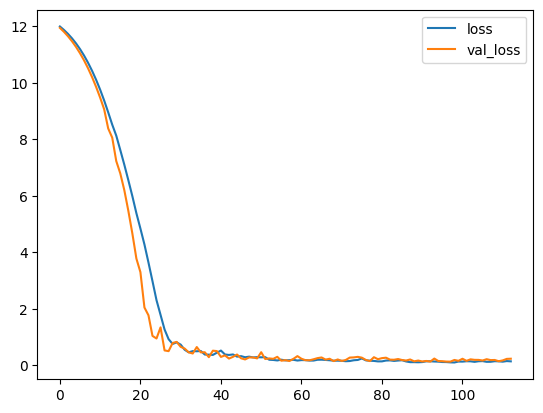

In [11]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 200
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=EPOCHS,
    verbose=0,
    callbacks = [early_stopping]
)
hist_df = pd.DataFrame(history.history)
hist_df.loc[0:,['loss','val_loss']].plot()
print(("Min Validation loss: {:0.4f}").format(hist_df['val_loss'].min()))

In [12]:
testdata= pd.read_csv('test.csv',keep_default_na = True)
X_test = testdata.drop('Id',axis=1)

In [13]:
X_test=preprocessor.transform(X_test)


In [14]:
X_test=X_test.toarray()
predictions=np.exp(model.predict(X_test))

46/46 [==============================] - 0s 1ms/step


In [15]:
predictions = [x for s in predictions for x in s]

In [21]:
np.array(testdata['Id'][1])

array(1462)

In [23]:
submit = pd.DataFrame({'Id':np.array(testdata['Id']),'SalePrice':predictions},columns=['Id','SalePrice'])
submit.to_csv(path_or_buf='housepricesubmission.csv',index=False)